# Assignment 6 – Color Image Processing and Simplified Research Problems

In [1]:
# imports and load images
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
import pywt


# load images
ball = cv2.imread('ball.bmp')
elephant1 = cv2.imread('Elephant1.jpg')
elephant2 = cv2.imread('Elephant2.jpg')
horse1 = cv2.imread('Horse1.jpg')
horse2 = cv2.imread('Horse2.jpg')
lena = cv2.imread('Lena.jpg')


## Problem 1: Color Image Processing
The task here is to help a robot identify a bright orange ball in its surroundings. The ball.bmp is an image
obtained from a camera mounted on the robot.
* Load ball.bmp and convert it to the Hue, Saturation, and Value (HSV) or Hue, Saturation,
and Intensity (HSI) color space by calling an appropriate function. In H-space (i.e., Hue image), apply
appropriate image processing techniques to separate the ball from the background. Please show your
intermediate results in Figure 1. Find the centroid of the ball and indicate its location by a visible blue
cross on the original color image in Figure 2.

*  Find the shadow of the ball and indicate the located shadow using a distinct color on the
original image. Please show your intermediate results in Figure 3 and your final shadow result in
Figure 4.


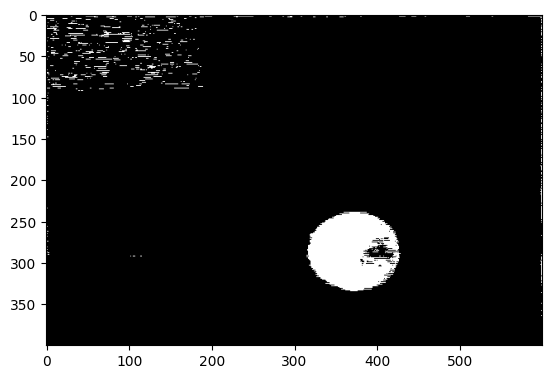

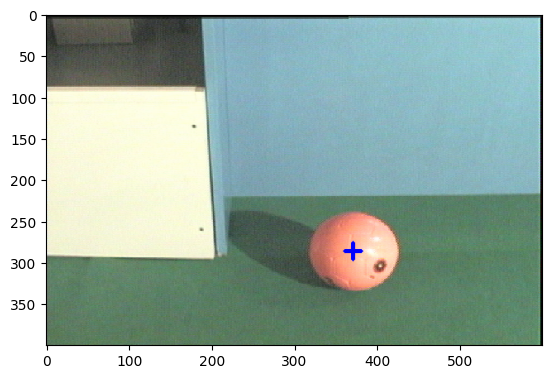

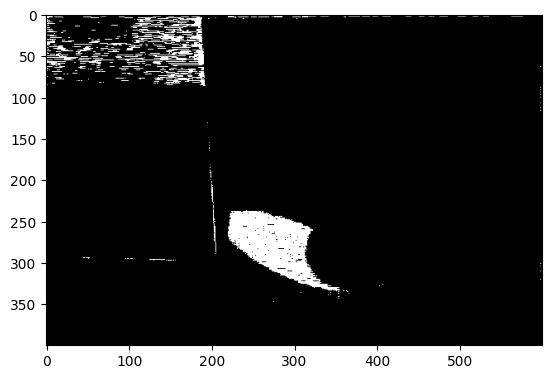

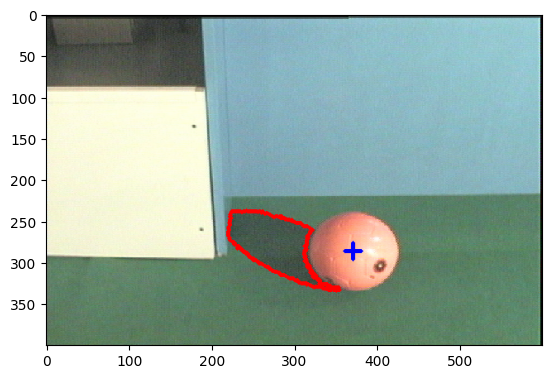

In [2]:
ball_hsv = cv2.cvtColor(ball, cv2.COLOR_BGR2HSV)

shadow_lower_hue = np.array([50, 0, 0])
shadow_upper_hue = np.array([100, 100, 100])
shadow_hue_mask = cv2.inRange(ball_hsv, shadow_lower_hue, shadow_upper_hue)

lower_hue = np.array([15, 0, 0])
upper_hue = np.array([150, 255, 255])

hue_mask = cv2.inRange(ball_hsv, lower_hue, upper_hue)
hue_mask = cv2.bitwise_not(hue_mask)






contours, hierarchy = cv2.findContours(hue_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

shadowContours, shadowHierarchy = cv2.findContours(shadow_hue_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

largest_shadow_contour = max(shadowContours, key=cv2.contourArea)

largest_contour = max(contours, key=cv2.contourArea)


center = cv2.moments(largest_contour)
shadow_center = cv2.moments(largest_shadow_contour)
if center['m00'] != 0:
    cx = int(center['m10']/center['m00'])
    cy = int(center['m01']/center['m00'])

    shadow_cx = int(shadow_center['m10']/shadow_center['m00'])
    shadow_cy = int(shadow_center['m01']/shadow_center['m00'])

    cv2.line(ball, (cx - 10, cy), (cx + 10, cy), (255, 0, 0), 3)
    cv2.line(ball, (cx, cy - 10), (cx, cy + 10), (255, 0, 0), 3)


    plt.imshow(hue_mask, cmap='gray')
    plt.show()

    ball = cv2.cvtColor(ball, cv2.COLOR_BGR2RGB)
    plt.imshow(ball)
    plt.show()

    

    plt.imshow(shadow_hue_mask, cmap='gray')
    plt.show()

    cv2.drawContours(ball, [largest_shadow_contour], -1, (255, 0, 0), 3)


    plt.imshow(ball)
    plt.show()




# Problem 2: Simple Color Image Retrieval
Content-Based Image Retrieval (CBIR) is a challenging research problem. It uses an image as a query to
search for similar images in a large image database. Below is a simple algorithm to search for a small image
database using low-level visual features, i.e., normalized color histogram

1. Compute Normalized Color Histogram: An image histogram refers to the probability mass
function of the image intensities. This is extended for color images to capture the joint probabilities of
the intensities of the three color channels. More formally, the normalized color histogram is defined
as:),,(),,(,, cCbBaAProbcbah CBA ====
where A , B, and C represent the three color channels (e.g., R, G, B or H, S, V). Computationally, the
color histogram is formed by discretizing the colors within an image, counting the number of pixels of
each color, and calculating the percentage of pixels of each color. Implement a
CalNormalizedHSVHist function to compute the normalized HSV color histogram for a color image.
This function has four input parameters im, hBinNum, sBinNum, and vBinNum, where im is the
original color image, and hBinNum, sBinNum, and vBinNum are the bin numbers in the Hue,
Satuation, and Value color space, respectively. It has one output parameter hist, which is a 1-D vector
for storing the percentage of pixels of each color. The length of this 1-D vector is
hBinNum×sBinNum×vBinNum



In [3]:
def noBuiltInFuncCalNormalizedHSVHist(im, hBinNum, sBinNum, vBinNum):
    im_hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
    hist = np.zeros((hBinNum, sBinNum, vBinNum))
    for i in range(im_hsv.shape[0]):
        for j in range(im_hsv.shape[1]):
            h = im_hsv[i, j, 0]
            s = im_hsv[i, j, 1]
            v = im_hsv[i, j, 2]
            hist[h, s, v] += 1
    hist = hist / np.sum(hist)
    return hist


def calNormalizedHSVHist(im, hBinNum, sBinNum, vBinNum):
    im_hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([im_hsv], [0, 1, 2], None, [hBinNum, sBinNum, vBinNum], [0, 180, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist)
    return hist



2. Assuming that you have a small image database with four images, namely Elephant1.jpg,
Elephant2.jpg, Horse1.jpg, and Horse2.jpg. Call the CalNormalizedHSVHist function to compute
the normalized 64-bin HSV color histogram (i.e., 4 bins in the Hue color space, 4 bins in the Saturation
color space, and 4 bins in the Value color space) for each image in this small database. Plot these four
histograms in Figure 5 with the appropriate title for each subplot. Respectively use each image as a
query to search this small database and display the retrieval results in Figures 6 through 9. Make sure
2
that each figure displays all retrieved images for each query with the corresponding ranking (e.g.,
ranking of 1, 2, 3, and 4 with 1 indicating the top match, 2 indicating the second top match, 3 indicating
the third top match, and 4 indicating the fourth top match) and the associated similarity score, which is
computed by the histogram intersection defined as follows:( )
( )
|||,|
||),,(|,|),,(
),( ghmin
gcbaghcbahmin
ghd A B C
 
=
where h and g represent the normalized histograms of two images, respectively. |h| and |g| represent
the magnitude of each histogram, which is equal to the number of pixels in each corresponding image

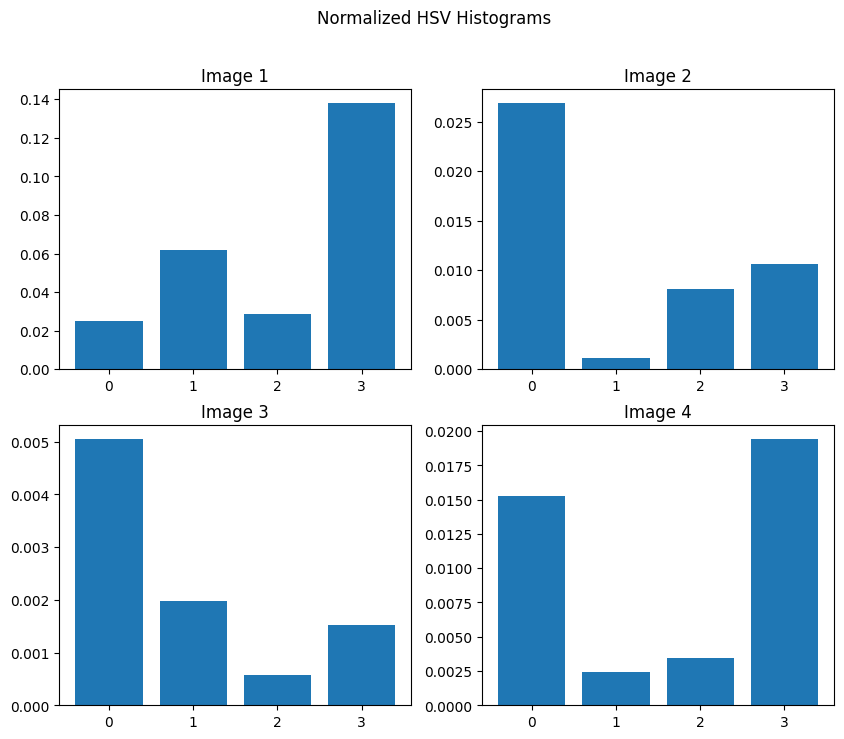

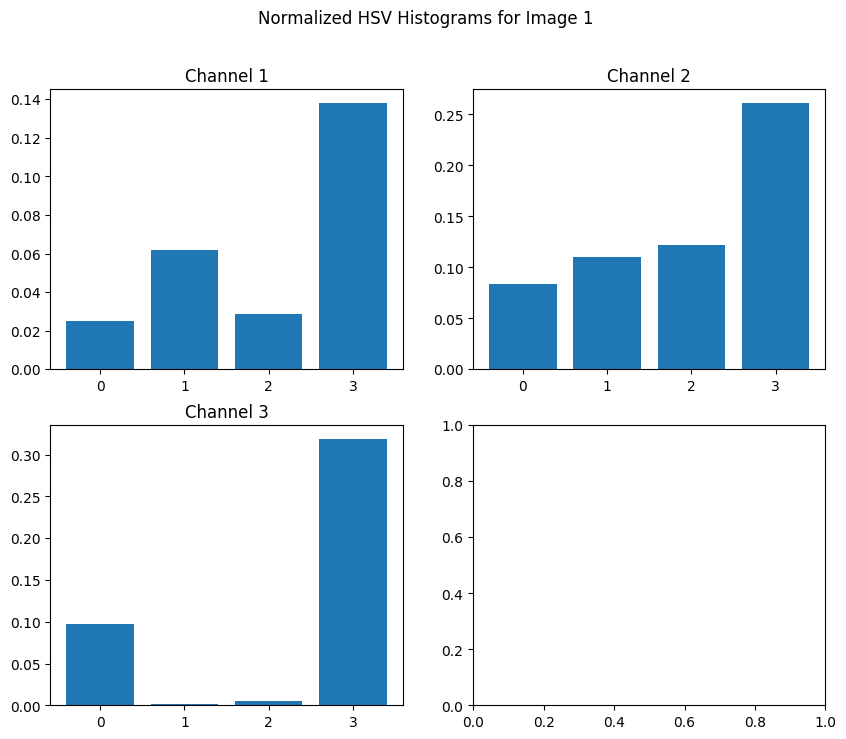

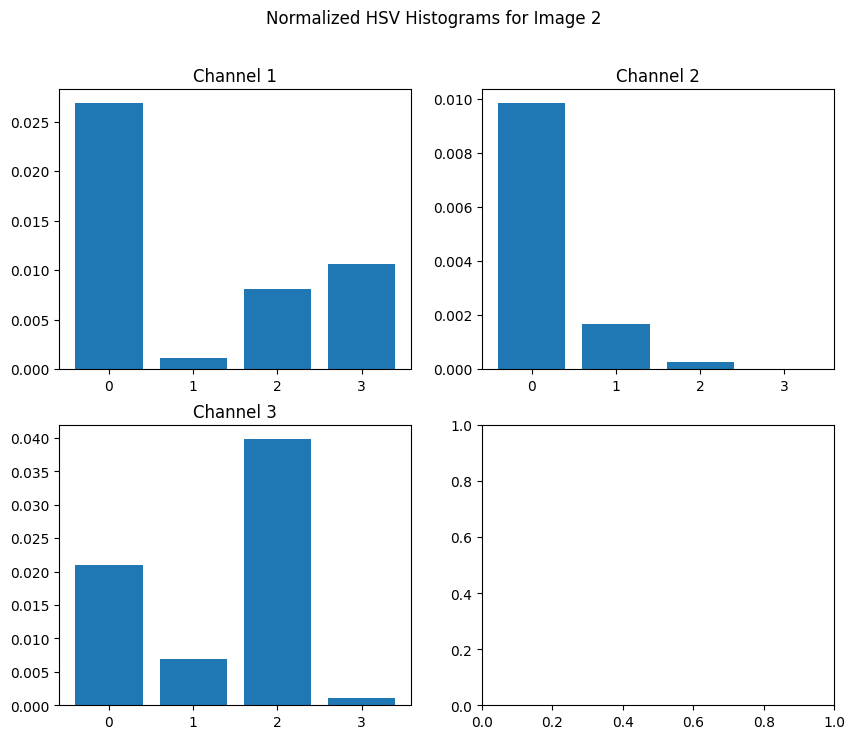

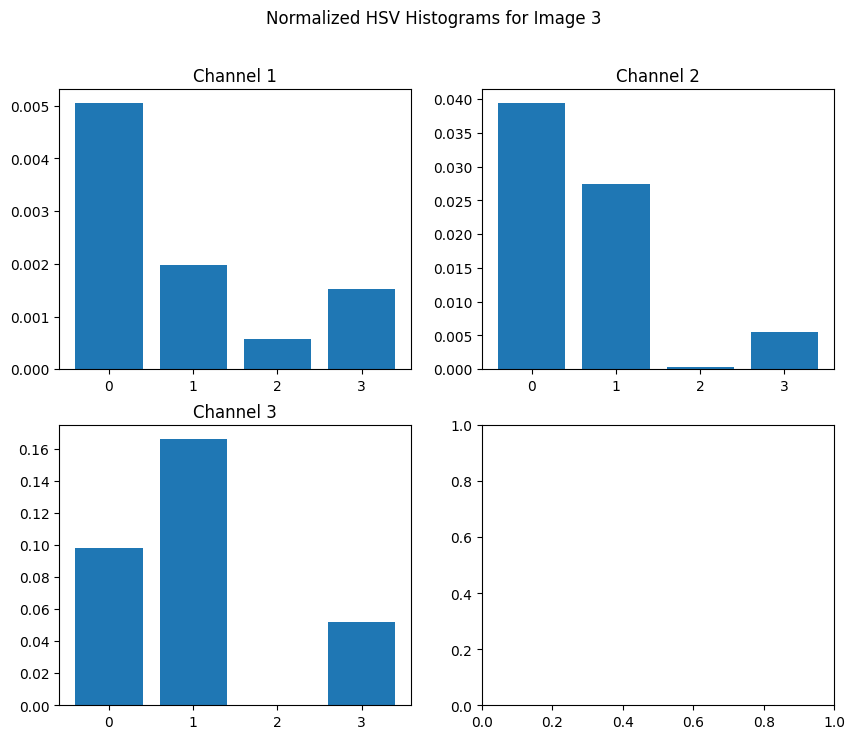

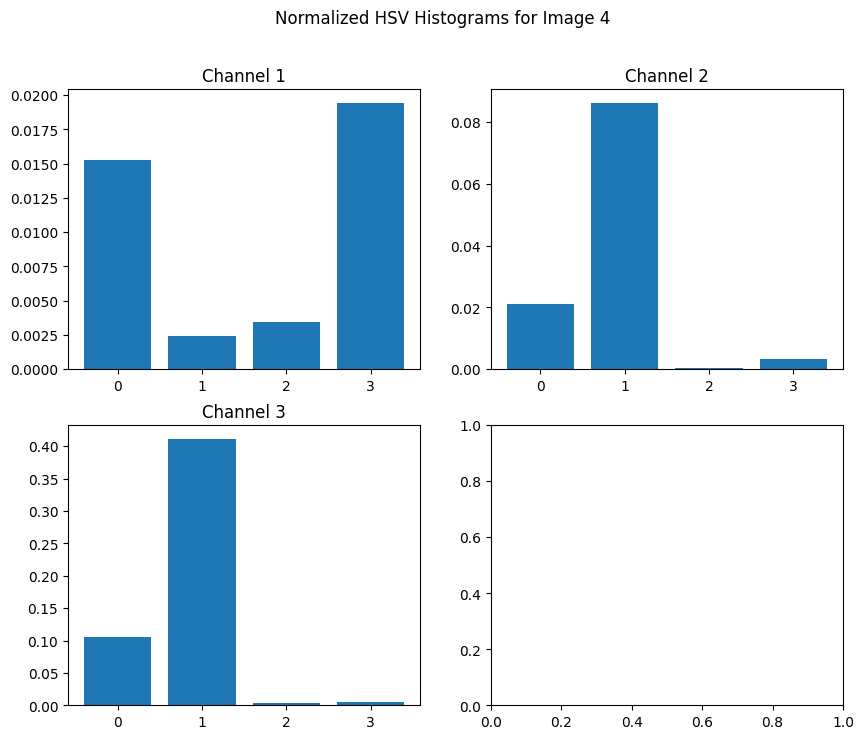

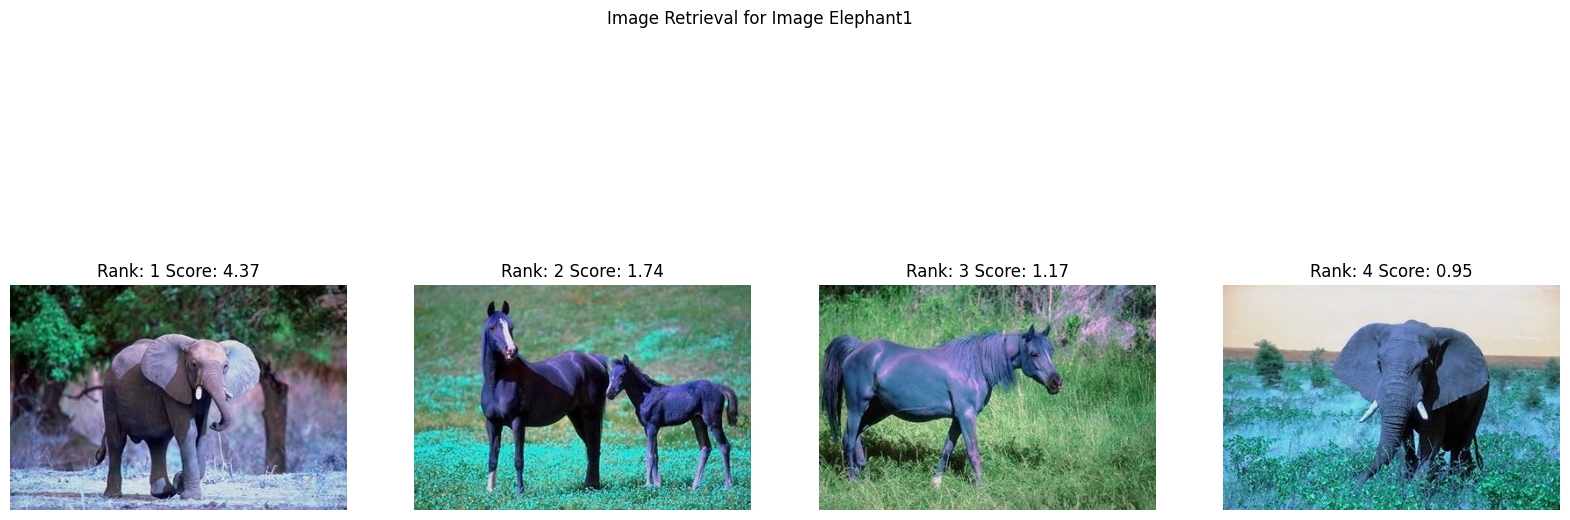

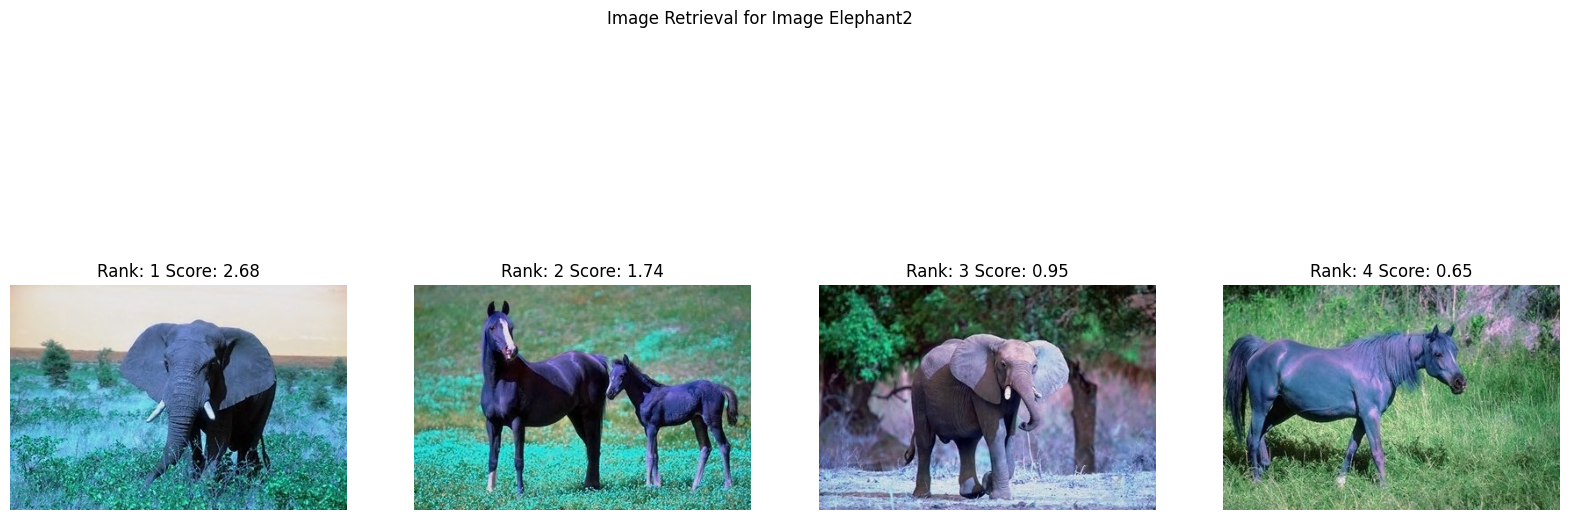

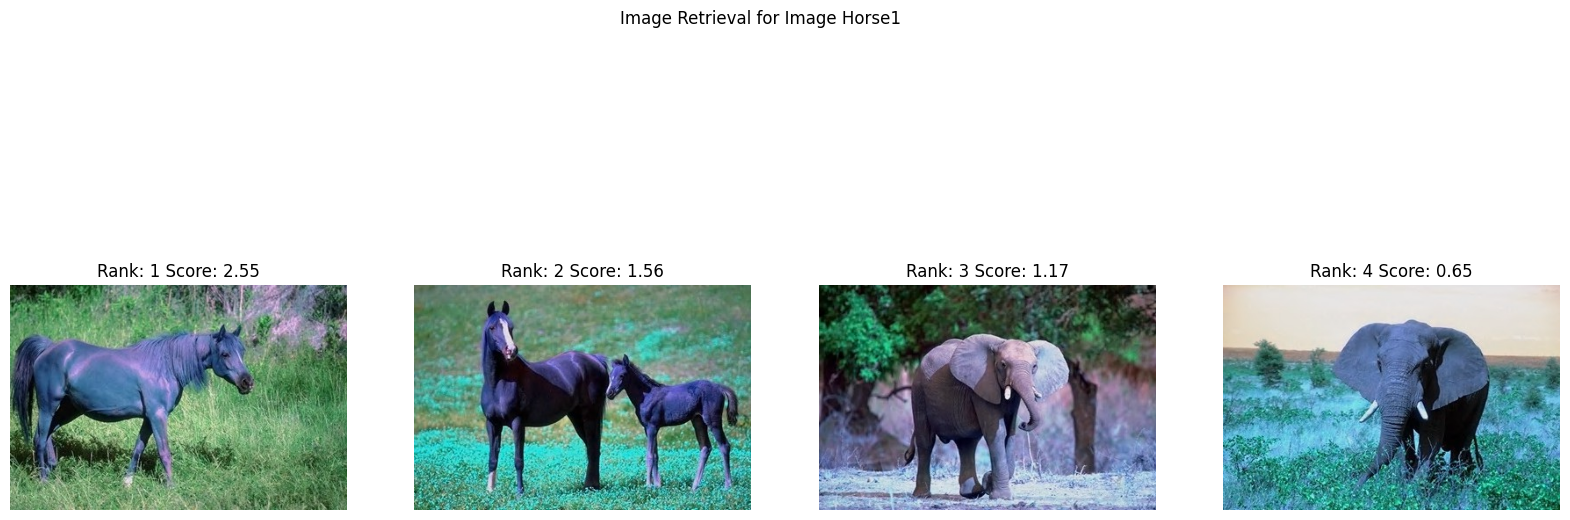

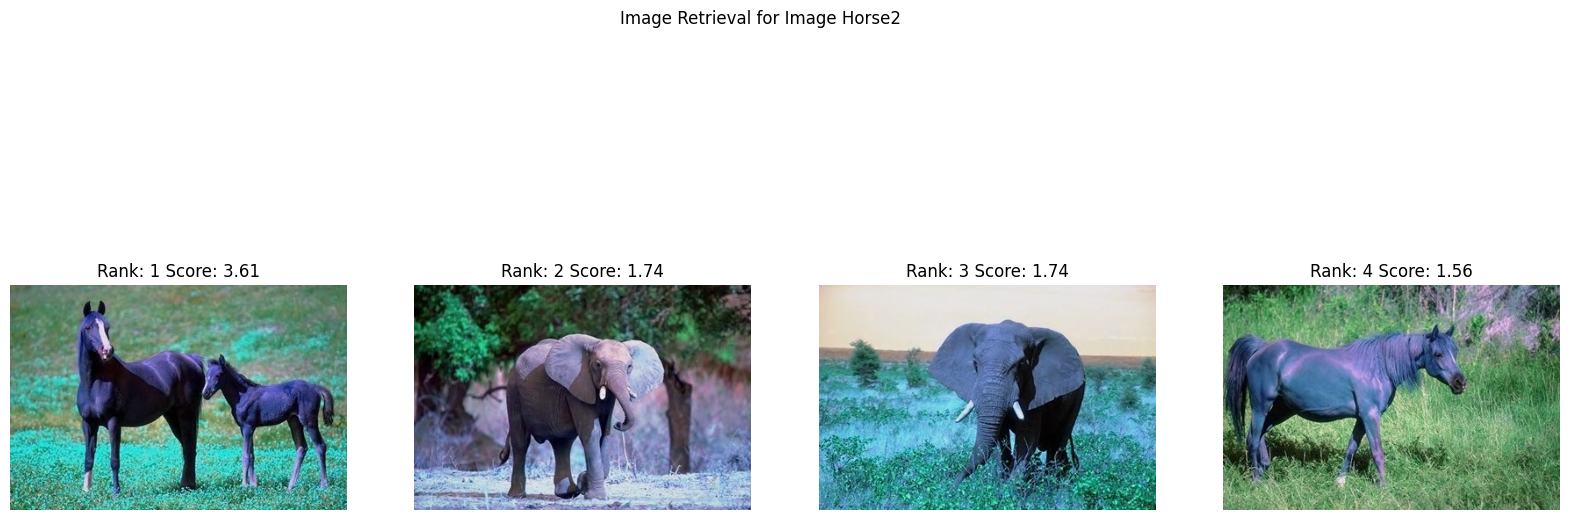

In [4]:
h_bins = 4
s_bins = 4
v_bins = 4

elephant1_hist = calNormalizedHSVHist(elephant1, h_bins, s_bins, v_bins)
elephant2_hist = calNormalizedHSVHist(elephant2, h_bins, s_bins, v_bins)
horse1_hist = calNormalizedHSVHist(horse1, h_bins, s_bins, v_bins)
horse2_hist = calNormalizedHSVHist(horse2, h_bins, s_bins, v_bins)

image_databse = [elephant1, elephant2, horse1, horse2]
image_database_hist = [elephant1_hist, elephant2_hist, horse1_hist, horse2_hist]
image_database_name_map = {0: 'Elephant1', 1: 'Elephant2', 2: 'Horse1', 3: 'Horse2'}

fig, axs = plt.subplots(2,2, figsize=(10,8))
fig.suptitle('Normalized HSV Histograms')

for i in range(len(image_database_hist)):
    axs[i//2, i%2].bar(range(h_bins), image_database_hist[i][:,0,0])
    axs[i//2, i%2].set_title('Image {}'.format(i+1))
    axs[i//2, i%2].set_xticks(range(h_bins))
    axs[i//2, i%2].set_xticklabels(range(h_bins))
plt.show()

for i in range(len(image_database_hist)):
    fig, axs = plt.subplots(2,2, figsize=(10,8))
    fig.suptitle('Normalized HSV Histograms for Image {}'.format(i+1))
    for j in range(3):
        axs[j//2, j%2].bar(range(h_bins), image_database_hist[i][:,0,j])
        axs[j//2, j%2].set_title('Channel {}'.format(j+1))
        axs[j//2, j%2].set_xticks(range(h_bins))
        axs[j//2, j%2].set_xticklabels(range(h_bins))
    plt.show()



def hist_intersection(hist1, hist2):
    return np.sum(np.minimum(hist1, hist2))

def image_retrieval(query_hist, database_histograms):
    scores = [hist_intersection(query_hist, db_hist) for db_hist in database_histograms]
    sorted_indices = np.argsort(scores)[::-1]
    return sorted_indices, scores



for i in range(len(image_database_hist)):
    query_hist = image_database_hist[i]
    sorted_indices, scores = image_retrieval(query_hist, image_database_hist)

    fig, axs = plt.subplots(1,4, figsize=(20,8))
    fig.suptitle('Image Retrieval for Image '+ image_database_name_map[i]+''.format(i+1))

    for j, index in enumerate(sorted_indices):
        axs[j].imshow(image_databse[index])
        axs[j].set_title('Rank: '+str(j+1) +' Score: {:.2f}'.format(scores[index]))
        axs[j].axis('off')
        
    plt.show()

    


# Problem 3: A Simple Watermarking Technique in Wavelet Domain

Digital watermarking techniques are viable solutions for copyright protection. Below is a simple algorithm to
embed copyright-related information (e.g., a watermark in the form of a random binary sequence) into an
original image to produce a watermarked image, which looks like the original image without any noticeable
changes. This simple algorithm can extract the embedded watermark from the watermarked image. Make
sure that you implemented one embedding function and one extraction function

1. Embedding Procedure: Apply a 3-level “db9” wavelet decomposition on Lena.jpg by using
an appropriate function. Apply an appropriate built-in function to generate b, a random sequence of
0’s and 1’s whose length equals the size of the approximation image (i.e., the top left subband LL3).
Make sure that this random sequence will be the same each time you re-run the program. Sequentially
embed each value of b into the approximation subband H in a raster scanning order (from the left to
the right and from the top to the bottom). For each paired b and H, conduct the following operation
using β = 30:( ) ( )   
( )
( ) ( )   
( )







=+−−+
=+−
=+−−−
=+−
=




















75.0mod),(0)(25.0mod)5.0),((5.0),(
75.0mod),(0)(25.0mod),(),(
25.0mod),(1)(75.0mod)25.0),((25.0),(
25.0mod),(1)(75.0mod),(),(
),('
jiHandkbifjiHjiH
jiHandkbifjiHjiH
jiHandkbifjiHjiH
jiHandkbifjiHjiH
jiH
Perform the inverse wavelet transform after the above operation to obtain the reconstructed image (i.e.,
the watermarked image), which stores or hides the binary sequence (watermark). Display the original
image, its watermarked image, and the difference image (i.e., the difference between the original and
watermarked images) in Figure 10. Due to the small differences, you need to apply a scaling operation
for a proper display. Note: The reconstructed image should be the type of uint8





/home/kf7mxe/.local/share/virtualenvs/Computer_Vision-ERhKS5AB/lib/python3.8/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 3 is too high: all coefficients will experience boundary effects.
  warnings.warn(


coeffs
[1331.80023804 1331.80023804 1331.80023804 1331.80023804 1331.80023804
 1331.80023804 1331.80023804 1331.80023804 1331.80023804 1331.80023804
 1331.80023804 1331.80023804 1331.80023804 1331.80023804 1331.80023804]
binary sequence
[1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1
 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0
 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1
 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1
 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1
 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0
 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0
 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1
 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1
 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1
 1 0 0 1 1 1 

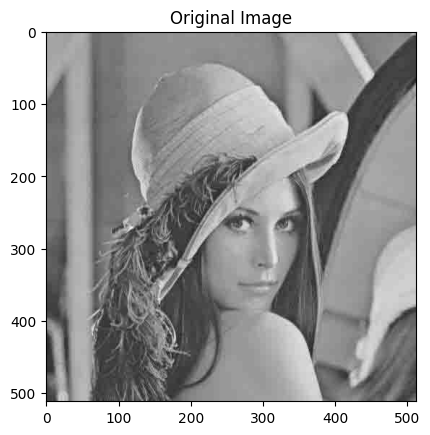

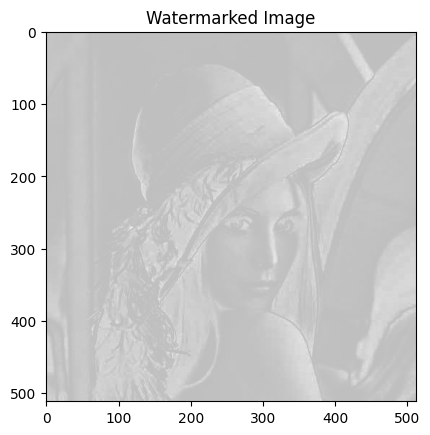

In [5]:
def embed_watermark(im, beta=30):

    coeffs = pywt.wavedec2(im, 'db9', level=3)
    print("coeffs")
    print(coeffs[0][0][0])

    np.random.seed(32)
    binary_sequence = np.random.randint(0, 2, size=len(coeffs[0]))
    print("binary sequence")
    print(binary_sequence)
    H = coeffs[0]
    for i in range(H.shape[0]):
        for j in range(H.shape[1]): 
            for k in range(H.shape[2]):
                if binary_sequence[k]==1 and H[i][j][0] % beta >= 0.25 * beta:
                    H[i][j]  = H[i][j] - (H[i][j] % beta) + 0.75 * beta

                if binary_sequence[k]==1 and H[i][j][0] % beta < 0.25 * beta:
                    H[i][j]  = (H[i][j] - 0.25 * beta) - (H[i][j] - 0.25 * beta) % beta + 0.75 * beta
                if binary_sequence[k]==0 and H[i][j][0] % beta <= 0.75 * beta:
                    H[i][j]  = H[i][j] - (H[i][j] % beta) + 0.25 * beta
                if binary_sequence[k]==0 and H[i][j][0] % beta > 0.75 * beta:
                    H[i][j]  = (H[i][j] + 0.5 * beta) - (H[i][j] - 0.5 * beta) % beta + 0.25 * beta
    coeffs[0] = H
    watermarked_image = pywt.waverec2(coeffs, 'db9')
    return watermarked_image, binary_sequence

embeded_watermarked_image, binary_sequence = embed_watermark(lena.copy())

# normalized watermarked_image
display_embeded_watermarked_image = np.clip(embeded_watermarked_image.copy(), 0, 255).astype(np.uint8)

plt.imshow(lena, cmap='gray')
plt.title('Original Image')
plt.show()

plt.imshow(display_embeded_watermarked_image, cmap='gray')
plt.title('Watermarked Image')
plt.show()


    


2. Extraction Procedure: For the reconstructed (watermarked) image, perform the following
operation: Apply a 3-level “db9” wavelet decomposition. For each approximation coefficient newH
scanned in the raster scan order, if newH(i, j) mod β > β/2 (here β = 30, the same value used in the
embedding procedure), set its paired newb(k) = 1. Otherwise, set its paired newb(k) = 0. Use “if-else”
statements to compare the extracted newb sequence and the original b sequence. Display the
appropriate message for each condition and show the percentage of the matched bits.


In [6]:
def extract_watermark(im, beta=30, threshold=0.7):

    coeffs = pywt.wavedec2(im, 'db9', level=3)

    binary_sequence = np.zeros(len(coeffs[0]))
    newH = coeffs[0]
    for i in range(newH.shape[0]):
        for j in range(newH.shape[1]): 
            for k in range(newH.shape[2]):
                if newH[i][j][0] % beta > beta/2:
                    binary_sequence[k] = 1
                else:
                    binary_sequence[k] = 0

    return binary_sequence




extracted_binary_sequence = extract_watermark(embeded_watermarked_image)
print(extracted_binary_sequence)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

3. Repeat steps 1 and 2 to embed the same random sequence b in the original image Lena.jpg
using β = 60. Display the original image, its watermarked image, and the difference image (i.e., the
difference between the original and watermarked images) in Figure 11. Display the appropriate
message for each condition and show the percentage of the matched bits.

In [7]:
# embed the watermark in the image
watermarked_image, binary_sequence = embed_watermark(lena.copy(), beta=60)

# extract the watermark from the watermarked image
extracted_binary_sequence = extract_watermark(watermarked_image, beta=60)

# calculate the accuracy
accuracy = np.sum(binary_sequence == extracted_binary_sequence) / len(binary_sequence)
print('Accuracy: {:.2f}'.format(accuracy))



coeffs
[1331.80023804 1331.80023804 1331.80023804 1331.80023804 1331.80023804
 1331.80023804 1331.80023804 1331.80023804 1331.80023804 1331.80023804
 1331.80023804 1331.80023804 1331.80023804 1331.80023804 1331.80023804]
binary sequence
[1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1
 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0
 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1
 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1
 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1
 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0
 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0
 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1
 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1
 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1
 1 0 0 1 1 1 